# Exploration of the Ford GoBike System data from the San Francisco bay area.
## by Christabel Okosun

## Introduction
    The dataset is the San Francisco Bay Area bike sharing data for Ford GoBike.
The dataset contains 16 columns, the columns are:
- Duration in seconds
- Start time
- End time
- Start-station-id
- The name of the start-station
- The longtitude and latitude of the start station.
- End station-id
- The name of the end station
- The longtitude and latitude of the end station
- The bike id
- The type of the users
- Member information (birth year and gender)
- Bike share used for all trip (yes/no)




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the data
bike = pd.read_csv("ford-bike.csv")
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
bike.shape

(183412, 16)

In [5]:
sum(bike.duplicated())

0

In [6]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# types of users
bike['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [8]:
# gender of users
bike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
bike['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [10]:
# making a copy of the data
bike_clean = bike.copy()

## Quality Issues

1. Missing rows in the start station id and name columns
2. Missing rows in the end station id and name columns
3. Redundant columns
4. Invalid datatypes
5. Null values in the member related columns

## Cleaning The Data

#### Define: drop rows in the data where start station name is null

#### Code:

In [11]:
names_ind = list(bike_clean[bike_clean['start_station_name'].isnull()==True].index)

In [12]:
bike_clean.drop(axis=0, index=names_ind, inplace=True)

In [13]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null object
end_time                   183215 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 23.8+ MB


In [14]:
# the second quality issue get sorted out
sum(bike_clean['end_station_name'].isna())

0

#### Define: drop redundant columns such as station id's, latitude, longitude, bike_id

#### Code

In [15]:
# Making a list of the redundant columns
redundant = ['start_station_id','end_station_id','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_id']
# dropping the redundant columns
bike_clean.drop(redundant, axis=1, inplace = True)

#### Test

In [16]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes


#### Define: change datatypes.

#### Code

In [17]:
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'user_type': 'category'}

bike_clean = bike_clean.astype(dtype)

#### Test

In [18]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 9 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_name         183215 non-null object
end_station_name           183215 non-null object
user_type                  183215 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 12.8+ MB


#### Define: Drop null values

#### Code:

In [19]:
bike_clean.dropna(inplace = True)

#### Test:

In [20]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 9 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_name         174952 non-null object
end_station_name           174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 12.2+ MB


### What is the structure of your dataset?

> After cleaning the data, my dataset is 183,215 observations and 9 variable

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are the proportion of users, gender of the riders, the age of the riders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in that would help support are the user_type, member_gender, member_birth_year.

## Univariate Exploration


#### How are the users divided?

In [21]:
def plot_pie(data, var): 
    colours = ['chocolate', 'blanchedalmond','khaki']
    counts = data[var].value_counts()
    plt.pie(counts, labels = counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False, colors =colours)

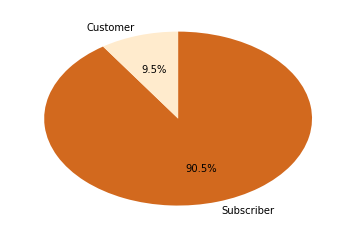

In [22]:
plot_pie(bike_clean, 'user_type')

##### 89.2 percent of people who used the bike share service are subscribed to the service while the remaining 10.8 percent are not.

#### What gender made use of the bike share sevice most?

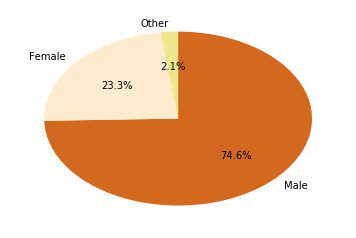

In [23]:
plot_pie(bike_clean,'member_gender')

##### The gender that made the most of the service were males wiyh 74.6 percent, followed by female with 23.3 percent.

#### What age uses the bike share the most?

In [24]:
#creating an age column
bike_clean['age'] = 2019 - bike_clean['member_birth_year']
bike_clean['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

Text(0.5,0,'Age')

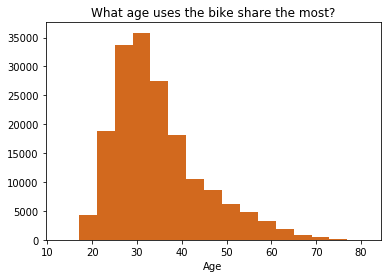

In [25]:
bins = np.arange(13, 80+4, 4)
plt.hist(data = bike_clean, x = 'age', bins = bins, color ='chocolate')
plt.title('What age uses the bike share the most?')
plt.xlabel('Age')

##### People within 30-33 tends to use the service the most.

#### What is the popuar trip trime?

In [26]:
#creating an hour column
bike_clean['hour'] = bike_clean['start_time'].dt.hour

Text(0.5,0,'')

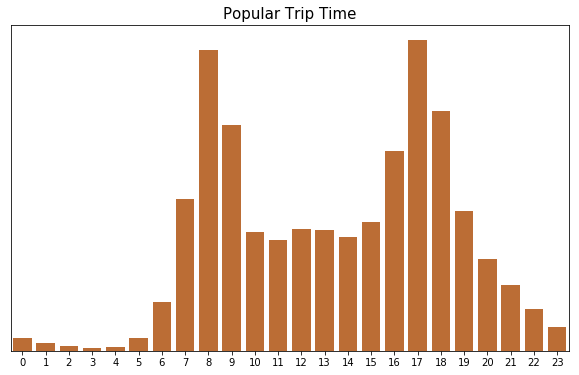

In [27]:
hour_order = np.arange(0,24)
colors= 'chocolate'
plt.figure(figsize=(10,6))
plt.title('Popular Trip Time', fontsize=15)
sb.countplot(data=bike_clean, x='hour', order=hour_order, color=colors)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

##### The popular trip time is around 8 a.m in the morning and in the afternoon 5 p.m. Yhis must been when people went to work and came back by 5.

#### What day do people use the service the most?

In [28]:
bike_clean['start_day'] = bike_clean['start_time'].dt.day_name()
bike_clean['start_day'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

Text(0.5,0,'')

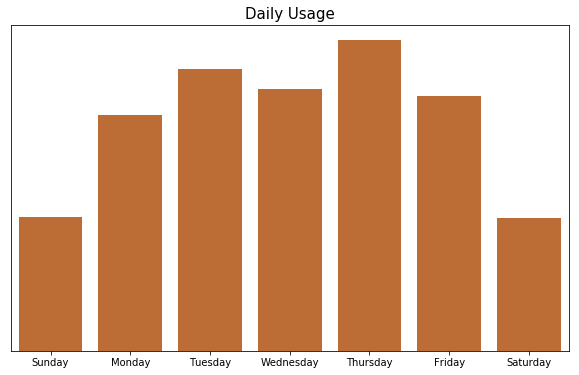

In [29]:
day = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
colors= 'chocolate'
plt.figure(figsize=(10,6))
plt.title('Daily Usage', fontsize=15)
sb.countplot(data=bike_clean, x='start_day', order=day, color=colors)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

##### Most people used the service on thursday

#### What are the popular stations to start with?

In [30]:
def plot_bar(data, var): 
    colors = 'chocolate'
    data[var].value_counts(normalize=True, ascending = False).head(10).plot.barh(color=colors)

Text(0.5,1,'Top 10 Start Stations')

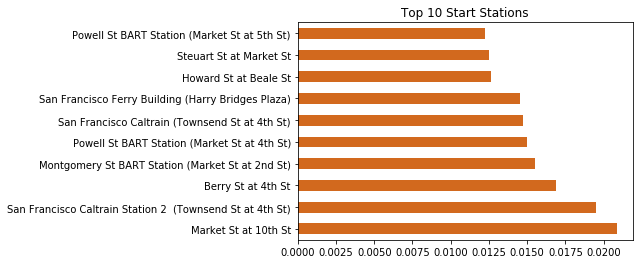

In [31]:
plot_bar(bike_clean, 'start_station_name')
plt.title('Top 10 Start Stations')

##### Market St at 10th St is the station most trips started at

#### What are the popular stations to end with?

Text(0.5,1,'Top 10 End Stations')

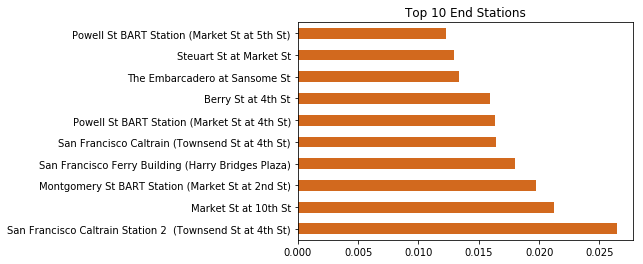

In [32]:
plot_bar(bike_clean, 'end_station_name')
plt.title('Top 10 End Stations')

##### San Francisco Caltrain Station 2 (Townsend St at 4th St is the station most trips ended at.

#### Least popular start stations 

In [33]:
def plot_lowest(data, var): 
    colors = 'chocolate'
    data[var].value_counts(normalize=True, ascending = True).head(10).plot.barh(color=colors)

Text(0.5,1,'Bottom 10 start stations')

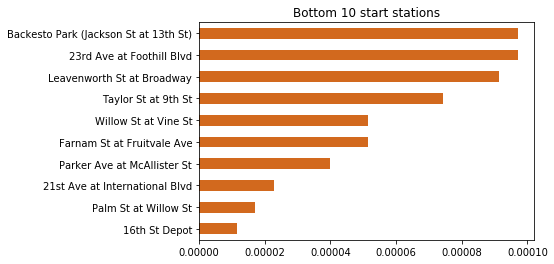

In [34]:
plot_lowest(bike_clean, 'start_station_name')
plt.title('Bottom 10 start stations')

##### Most people don't start their trips at 16th St Depot.

#### Least popular stations to end at

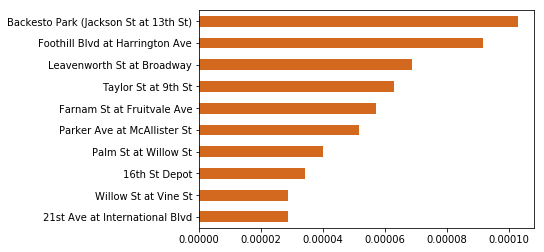

In [35]:
plot_lowest(bike_clean, 'end_station_name')

##### Most people do not end their trip at Willow St at Vine St

#### What duration do most people use the bike for?

Text(0.5,0,'Duration')

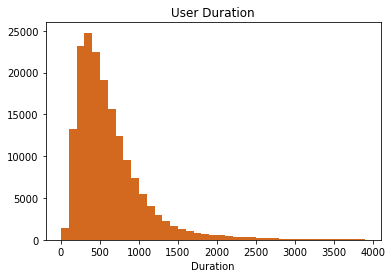

In [36]:
bins = np.arange(0, 4000, 100)
plt.hist(data = bike_clean, x = 'duration_sec', bins = bins, color ='chocolate')
plt.title('User Duration')

plt.xlabel('Duration')

##### Most people used the bikes for around 500-600 seconds

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For the member birth year, there were some of 140 years of age, while plotting I had to reduce the maximum bin to 80.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the start time column, I had to expan it by day of week and how to further analyze it

## Bivariate Exploration



#### What day of the week had the highest trip duration?

Text(0.5,0,'')

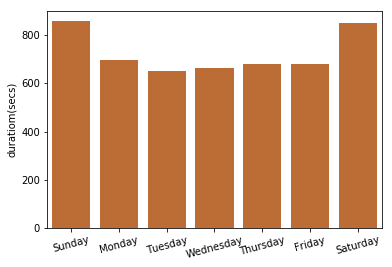

In [38]:
sb.barplot(data=bike_clean, x='start_day', y='duration_sec', ci=None, color='chocolate', order=day)
plt.xticks(rotation=15)
plt.ylabel('duratiom(secs)')
plt.xlabel('')

##### Sunday and Saturday had the highest trip durations, this might be because of prople going to far distances for leisure.

#### What is the distribution of gender across the user type

Text(0.5,1,'Gender of the Users')

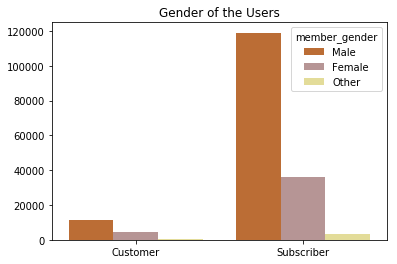

In [39]:
gender = ['Male','Female','Other']
co = ['chocolate', 'rosybrown','khaki']
sb.countplot(data = bike_clean, x = 'user_type', hue = 'member_gender',hue_order=gender, palette=co)
plt.xlabel('')
plt.ylabel('')
plt.title('Gender of the Users')

##### Most of the users are of the male gender for both the customer and subscriber

#### What type of user biked the longest distance?

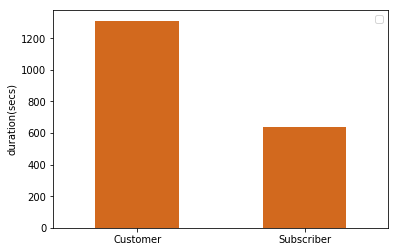

In [40]:
average_duration = bike_clean[['user_type','duration_sec']].groupby('user_type').mean()
average_duration.plot.bar(color='chocolate')
plt.xticks(rotation=0)
plt.ylabel('duration(secs)')
plt.xlabel('')
plt.legend('')

##### Customer user type had the higher trip duration. Although subsciber user type had the highet users of the service, it would seem that subscribers only make short trips

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> What i found interesting was the weekend having the highest trip duration, and this might be because people are going to far places for leisure

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The customer user type having the highest trip duration, I would have thought it would be the subscriber has they have already subscribe for the service.

## Multivariate Exploration



#### What gender had the highest trip duration?

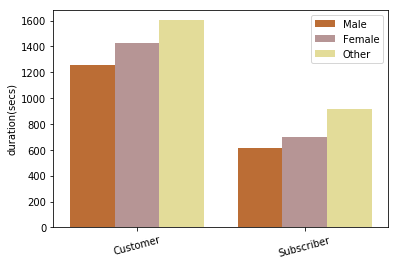

In [42]:
gender = ['Male','Female','Other']
sb.barplot(data=bike_clean, x='user_type', y='duration_sec', ci=None, hue='member_gender', hue_order= gender, palette=co)
plt.xticks(rotation=15)
plt.ylabel('duration(secs)')
plt.xlabel('')
plt.legend()

##### Users who did not provide their gender had the highest trip duration across both user types.

#### What user type had the highest trip duration across all days?

Text(0.5,0,'')

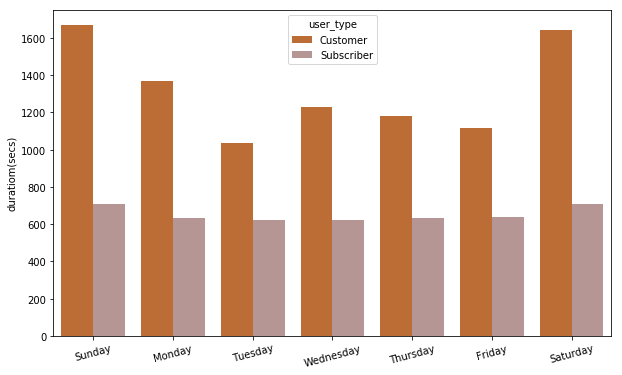

In [44]:
plt.figure(figsize=(10,6))
sb.barplot(data=bike_clean, x='start_day', y='duration_sec', ci=None, hue='user_type', order=day, palette=co)
plt.xticks(rotation=15)
plt.ylabel('duratiom(secs)')
plt.xlabel('')

##### Customer user type had the highest trip duration across all days

#### What hour had the highest trip duration?

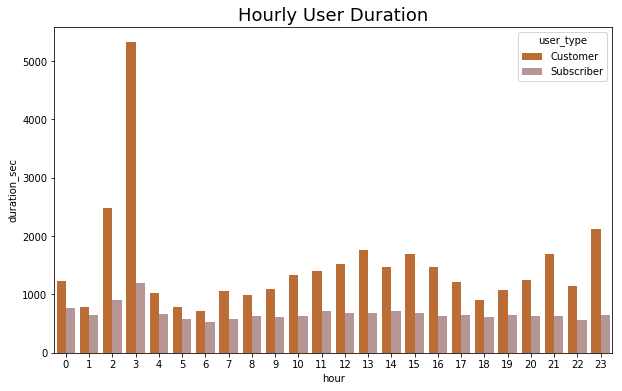

In [45]:
plt.figure(figsize=(10,6))
plt.title('Hourly User Duration', fontsize=18)
sb.barplot(data=bike_clean, x='hour', y='duration_sec', ci=None, hue='user_type', palette=co)

##### 3 a.m had the highest trip duration and it was by cusomer user type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Users who did not provide their gender had the highest duration across all users.

### Were there any interesting or surprising interactions between features?

> Something interesting was 3 a.m having the highest trip duration

In [46]:
# exporting the data
bike_clean.to_csv('bike_clean.csv', index=None)
